# Analysis of the Causes of Aircraft Crashes by NLP

In [ ]:
pip install numpy==1.19.3

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import re
import string

from wordcloud import WordCloud

import nltk

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download("punkt")

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer,TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

stop_words = stopwords.words('english')
lem = WordNetLemmatizer()

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Alp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
#df = pd.read_csv('f-16_2.csv')
df = pd.read_csv('f-16_2.csv',encoding='ANSI')

In [10]:
df.head()

,Date,Type,Details,Fatality
0,Oct-80,F-16A,The aircraft crash landed on Rogers dry lake b...,0
1,Unknown,F-16A Block 1,\t\nSuffered a mishap on landing. The nose ge...,0
2,Nov-89,F-16A Block 1,Engine turbine failed during a take-off roll s...,0
3,Feb-85,F-16A Block 1,"Destroyed near Luke AFB, Arizona at Gila Bend ...",0
4,Oct-79,F-16A Block 1,Crashed in Nevada due to an engine problem. An...,0


In [11]:
df.sample(8)

,Date,Type,Details,Fatality
202,Oct-09,F-16D Block 25E,Made an emergency landing short of the runway ...,0
235,Nov-14,F-16C Block 30B,Aircraft had not completed modifications to QF...,1
76,Jan-84,F-16A Block 15A,\t\nWas lost in a training accident in mounta...,0
441,Feb-93,F-16D Block 40H,"\t\n\t\nDestroyed near Eielson AFB, Alaska. B...",1
360,Sep-94,F-16C Block 40C,\t\n\t\nCrashed at about 11:00 hours in a cor...,0
176,Sep-88,F-16C Block 25D,"\t\nHit the ground near Sumter, South Carolin...",1
80,Jul-96,F-16A Block 15B ADF,\t\n\t\nThe aircraft crashed on the runway. I...,0
216,Jan-91,F-16C Block 25F,"Crashed 75 miles north of Las Vegas, in the Ne...",0


In [106]:
df.shape

(492, 6)

In [12]:
df.isnull().sum()

Date        0
Type        0
Details     8
Fatality    0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      500 non-null    object
 1   Type      500 non-null    object
 2   Details   492 non-null    object
 3   Fatality  500 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 15.8+ KB


In [14]:
df.shape

(500, 4)

In [15]:
df.Type.value_counts()

F-16C Block 40C        15
F-16C Block 30D        14
F-16C Block 30B        12
F-16C Block 50D        12
F-16C Block 40F        12
                       ..
F-16B Block 15K ADF     1
F-16B Block 15Q         1
F-16C Block 50A         1
F-16D Block 30A         1
F-16B Block 15H         1
Name: Type, Length: 137, dtype: int64

In [16]:
df.Date.value_counts()

Unknown    16
Jan-91     12
Sep-11      7
Feb-91      6
Jun-03      5
           ..
Feb-10      1
Jan-07      1
Jan-04      1
Apr-82      1
Oct-97      1
Name: Date, Length: 269, dtype: int64

In [17]:
df['Year'] = df['Date'].astype(str).str[4:6]

In [115]:
df.sample(3)

,Date,Type,Details,Fatality,Year,Month
454,Nov-05,F-16C Block 50B,aircraft made emergency landing ninoy aquino m...,0,05,Nov
485,Jan-99,F-16c Block 50P,went mountainous forest near city kamaishshi n...,0,99,Jan
288,Jan-91,F-16C Block 30F,shot desert storm combat loss number desert st...,0,91,Jan


In [19]:
df['Month'] = df['Date'].astype(str).str[0:3]

In [116]:
df.sample(3)

,Date,Type,Details,Fatality,Year,Month
419,Feb-94,F-16C Block 40G,heavily damaged porotoz slovenia operation den...,0,94,Feb
278,Feb-91,F-16C Block 30E,crashed diyarbakir turkey engine exploaded ref...,0,91,Feb
443,Feb-00,F-16D Block 40J,crashed eight kilometre north donaldsonville g...,0,00,Feb


In [109]:
df.Year.value_counts()

91    32
93    27
88    23
92    22
98    20
90    19
89    18
94    16
82    16
ow    16
00    15
97    15
99    15
87    14
01    13
95    13
11    12
03    12
96    12
05    12
06    12
04    12
85    11
02    11
86    10
84    10
83     9
07     9
09     8
13     8
14     6
15     5
80     5
81     5
12     5
16     4
08     4
17     3
10     3
79     2
19     2
18     2
c      1
v      1
l      1
g      1
Name: Year, dtype: int64

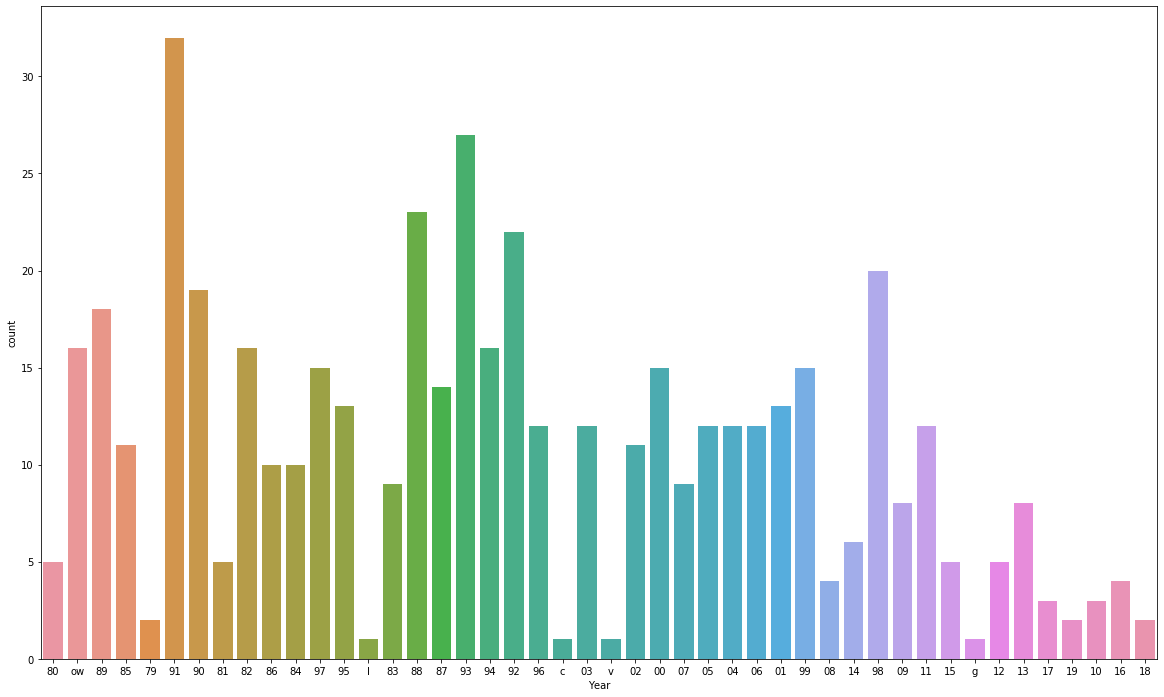

In [113]:
plt.figure(figsize=(20,12))
sns.countplot(data=df, x = 'Year')

In [22]:
df.shape

(500, 6)

In [23]:
df = df[df['Details'].notna()]

In [24]:
df.shape

(492, 6)

**Text Mining**

In [119]:
def cleaning(data):
    
    #1. Tokenize
    text_tokens = word_tokenize(data.lower())   #removed the .lower intentionaly to keep NNP s
    
    #2. Remove Puncs
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #4. lemma
    text_cleaned = [lem.lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [120]:
df['Details'] = df['Details'].apply(cleaning)

In [27]:
df.head()

,Date,Type,Details,Fatality,Year,Month
0,Oct-80,F-16A,aircraft crash landed rogers dry lake bed edwa...,0,80,Oct
1,Unknown,F-16A Block 1,suffered mishap landing nose gear would come p...,0,ow,Unk
2,Nov-89,F-16A Block 1,engine turbine failed roll sending piece turbi...,0,89,Nov
3,Feb-85,F-16A Block 1,destroyed near luke afb arizona gila bend auxi...,0,85,Feb
4,Oct-79,F-16A Block 1,crashed nevada due engine problem mot e aircra...,0,79,Oct


**Word Cloud**

In [28]:
reports =[]

for review in df.Details:
    reports.append(review) 
reports = ' '.join(reports)
reports[:200]

'aircraft crash landed rogers dry lake bed edward afb due blown nose gear tire take annual open house air show shipped general dynamic fort worth rebuilt first flying back edward one year later decembe'

In [29]:
len(reports)

105419

In [121]:
from wordcloud import WordCloud

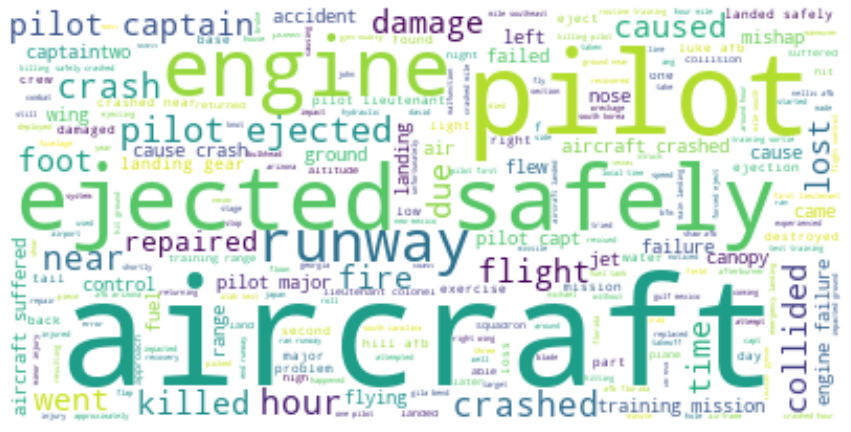

In [24]:
wordcloud = WordCloud(background_color="white", max_words=len(reports))

wordcloud.generate(reports)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [31]:
wordcloud.to_file("WC_F-16-report-1.png")

In [25]:
reports.count('aircraft')

532

In [26]:
reports = reports.replace('aircraft', '')

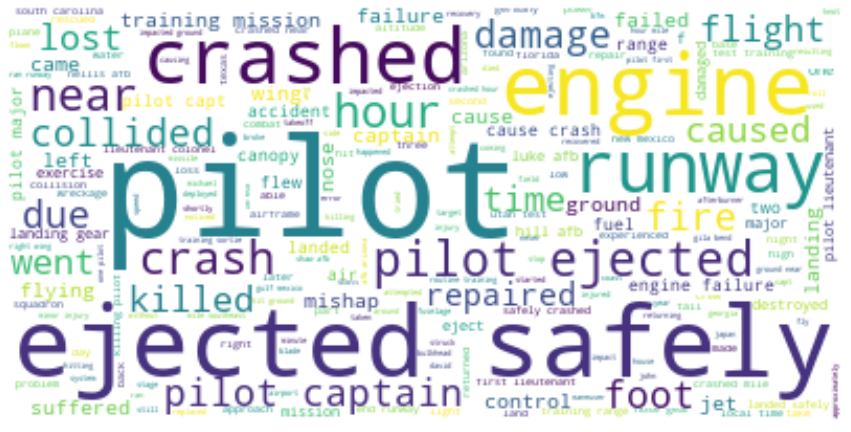

In [27]:
wordcloud = WordCloud(background_color="white", max_words=len(reports))

wordcloud.generate(reports)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [28]:
wordcloud.to_file("WC_F-16_aircraft-report-2.png")

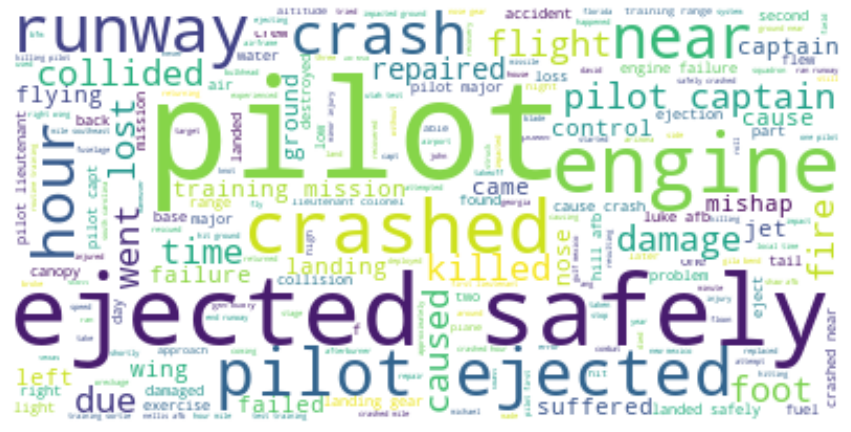

In [29]:
wordcloud = WordCloud(background_color="white", max_words=200)

wordcloud.generate(reports)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [30]:
wordcloud.to_file("WC_F-16_aircraft-report-3_200words.png")

In [32]:
from collections import Counter
most_common_words = Counter(" ".join(df["Details"]).split()).most_common(20)
most_common_words

[('aircraft', 532),
 ('pilot', 517),
 ('ejected', 220),
 ('safely', 201),
 ('crashed', 177),
 ('engine', 172),
 ('afb', 150),
 ('runway', 120),
 ('hour', 116),
 ('near', 111),
 ('training', 101),
 ('crash', 98),
 ('mile', 96),
 ('landing', 91),
 ('captain', 91),
 ('cause', 82),
 ('ground', 80),
 ('flight', 76),
 ('failure', 73),
 ('gear', 70)]

**Word Cloud - Year Analysis**

In [122]:
counts = df['Year'].value_counts()

In [123]:
counts = counts.replace('ow', '')

In [124]:
counts.index = counts.index.map(str)

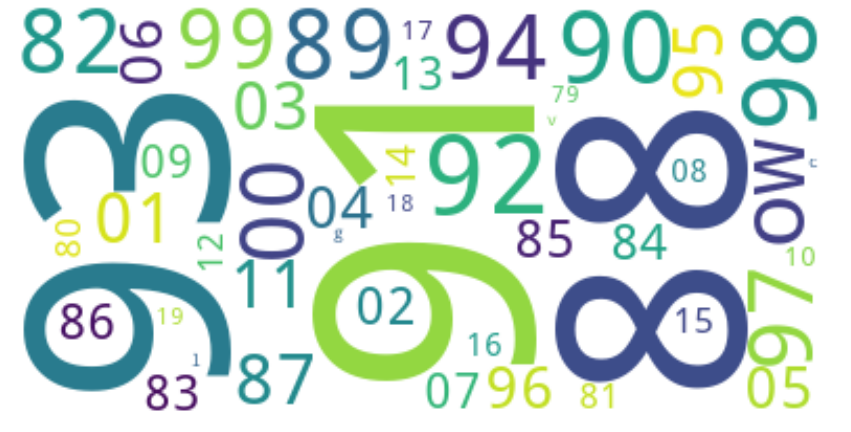

In [125]:
wordcloud = WordCloud(background_color="white").generate_from_frequencies(counts)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [126]:
wordcloud.to_file("WC_F-16_year.png")

**Word Cloud - Month Analysis**

In [57]:
df.Month.value_counts()

Jun    52
Jan    50
Mar    44
Sep    44
Nov    40
Oct    39
Jul    37
May    35
Feb    34
Apr    34
Aug    32
Dec    31
Unk    16
1-D     1
1-J     1
1-A     1
1-N     1
Name: Month, dtype: int64

In [ ]:
mm =[]

for review in df.Month:
    mm.append(review) 
mm = ' '.join(mm)
mm[:200]

In [62]:
mm = mm.replace('Unk', '')

In [64]:
mm[:200]

'Oct  Nov Feb Oct Jan Jan Apr Apr Mar Mar Mar Mar Mar Aug Jan Feb May Jun Jun Oct Aug Oct Jul May    Mar Oct Mar Jul Nov May Jun Apr Apr Jan Feb Sep Dec Jul May  Feb Apr Jun Jan May Jan Apr Mar Jun Jan'

In [68]:
len(mm)

1907

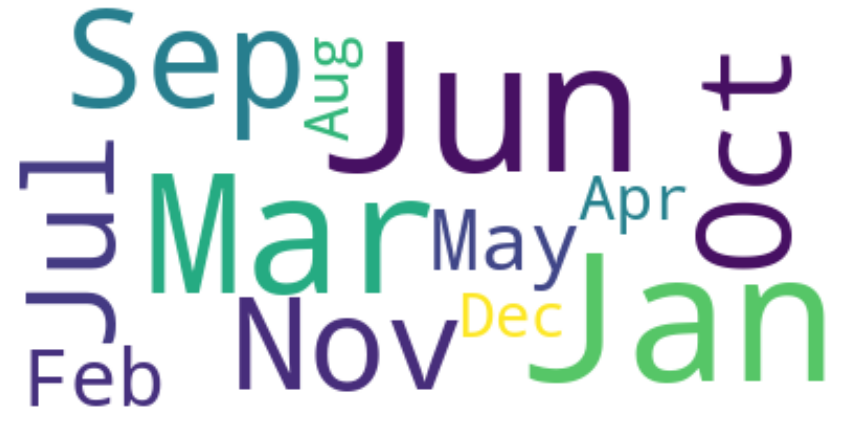

In [74]:
wordcloud = WordCloud(background_color="white", max_words=len(mm))

wordcloud.generate(mm)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [80]:
df.Month.value_counts()

Jun    52
Jan    50
Mar    44
Sep    44
Nov    40
Oct    39
Jul    37
May    35
Feb    34
Apr    34
Aug    32
Dec    31
Unk    16
1-D     1
1-J     1
1-A     1
1-N     1
Name: Month, dtype: int64


In [75]:
wordcloud.to_file("WC_F-16-month-1.png")

# Fatality Classification (Estimation) with Machine Learning

In [32]:
df['Fatality'].value_counts()

0    394
1     98
Name: Fatality, dtype: int64

In [117]:
df['Fatality'].value_counts()

0    394
1     98
Name: Fatality, dtype: int64

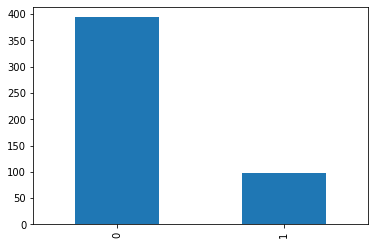

In [31]:
df['Fatality'].value_counts().plot.bar();

In [34]:
#from textblob import TextBlob
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from warnings import filterwarnings
filterwarnings('ignore')
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Alp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

**Train-Test-Split**

In [35]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df["Details"],
                                                                   df["Fatality"],test_size=0.25,
                                                                    random_state = 1)

In [36]:
X_train.head()

264    crashed crow valley philippine hour pilot lieu...
85     aircraft number two training exercise towards ...
49     aircraft suffered stuck throttle incident stab...
145    crashed mile homestead afb florida hour aircra...
141    pilot ejected safely crashing aircraft trainin...
Name: Details, dtype: object

**Vectorization**

In [37]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [38]:
X_train_count = vectorizer.transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [39]:
X_train_count

<369x2753 sparse matrix of type '<class 'numpy.int64'>'
	with 10297 stored elements in Compressed Sparse Row format>

In [40]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [41]:
a=pd.DataFrame(X_train_count.toarray())
a.head()

,0,1,2,3,4,5,6,7,8,9,...,2743,2744,2745,2746,2747,2748,2749,2750,2751,2752
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
a.shape

(369, 2753)

**TF-IDF**

In [43]:
tf_idf_word_vectorizer = TfidfVectorizer()
tf_idf_word_vectorizer.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [44]:
X_train_tf_idf_word = tf_idf_word_vectorizer.transform(X_train)
X_test_tf_idf_word = tf_idf_word_vectorizer.transform(X_test)

In [45]:
tf_idf_word_vectorizer.get_feature_names()[0:5]

['aaa', 'aaf', 'aar', 'aaron', 'ab']

In [46]:
b=pd.DataFrame(X_train_tf_idf_word.toarray())

In [47]:
b.head()

,0,1,2,3,4,5,6,7,8,9,...,2743,2744,2745,2746,2747,2748,2749,2750,2751,2752
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Logistic Regression**

In [48]:
from sklearn.metrics import f1_score

In [49]:
model = LogisticRegression()
model.fit(X_train_count, y_train)


log_count_acc = cross_val_score(model, X_test_count, y_test,cv = 10).mean()
print(log_count_acc)

0.9282051282051281


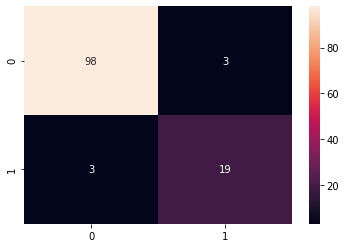

In [50]:
y_pred = model.predict(X_test_count)

cnf_matrix = confusion_matrix(y_test,y_pred) 
sns.heatmap(cnf_matrix,annot=True,fmt="d");

In [51]:
log_count_f1 = f1_score(y_test, y_pred, average='weighted')
log_count_f1

0.9512195121951219

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       101
           1       0.86      0.86      0.86        22

    accuracy                           0.95       123
   macro avg       0.92      0.92      0.92       123
weighted avg       0.95      0.95      0.95       123



In [53]:
model = LogisticRegression()
model.fit(X_train_tf_idf_word, y_train)


log_tf_acc = cross_val_score(model, X_test_tf_idf_word, y_test,cv = 10).mean()
print(log_tf_acc)

0.8217948717948718


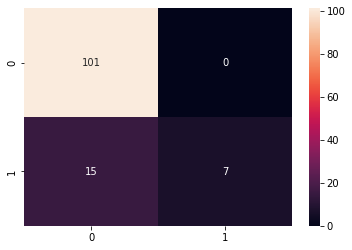

In [54]:
y_pred = model.predict(X_test_tf_idf_word)

cnf_matrix = confusion_matrix(y_test,y_pred) 
sns.heatmap(cnf_matrix,annot=True,fmt="d")

In [55]:
log_tf_f1 = f1_score(y_test, y_pred, average='weighted')
log_tf_f1

0.8507245758934628

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       101
           1       1.00      0.32      0.48        22

    accuracy                           0.88       123
   macro avg       0.94      0.66      0.71       123
weighted avg       0.89      0.88      0.85       123



**Naive Bayes**

In [58]:
model = MultinomialNB()
model.fit(X_train_count, y_train)

nb_count_acc = cross_val_score(model, X_test_count, y_test,cv = 10).mean()
print(nb_count_acc)

0.8544871794871796


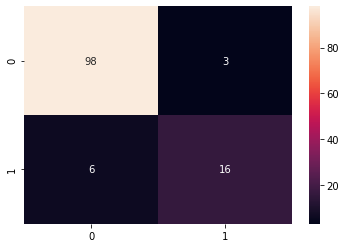

In [59]:
y_pred = model.predict(X_test_count)

cnf_matrix = confusion_matrix(y_test,y_pred) 
sns.heatmap(cnf_matrix,annot=True,fmt="d")

In [60]:
nb_count_f1 = f1_score(y_test, y_pred, average='weighted')
nb_count_f1

0.9246876859012493

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       101
           1       0.84      0.73      0.78        22

    accuracy                           0.93       123
   macro avg       0.89      0.85      0.87       123
weighted avg       0.92      0.93      0.92       123



In [62]:
model = MultinomialNB()
model.fit(X_train_tf_idf_word, y_train)


nb_tf_acc = cross_val_score(model, X_test_tf_idf_word, y_test,cv = 10).mean()
print(nb_tf_acc)

0.8217948717948718


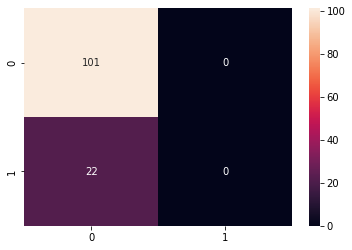

In [63]:
y_pred = model.predict(X_test_tf_idf_word)

cnf_matrix = confusion_matrix(y_test,y_pred) 
sns.heatmap(cnf_matrix,annot=True,fmt="d")

In [64]:
nb_tf_f1 = f1_score(y_test, y_pred, average='weighted')
nb_tf_f1

0.7404907084785133

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       101
           1       0.00      0.00      0.00        22

    accuracy                           0.82       123
   macro avg       0.41      0.50      0.45       123
weighted avg       0.67      0.82      0.74       123



**Support Vector Machine (SVM)**

In [66]:
model = SVC()
model.fit(X_train_count, y_train)

svm_count_acc = cross_val_score(model, X_test_count, y_test,cv = 10).mean()
print(svm_count_acc)

0.8217948717948718


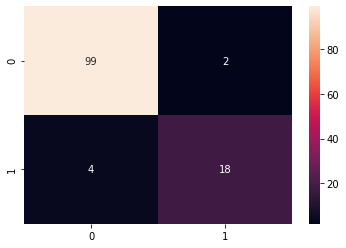

In [67]:
y_pred = model.predict(X_test_count)

cnf_matrix = confusion_matrix(y_test,y_pred) 
sns.heatmap(cnf_matrix,annot=True,fmt="d")

In [68]:
svm_count_f1 = f1_score(y_test, y_pred, average='weighted')
svm_count_f1

0.9502971920475509

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       101
           1       0.90      0.82      0.86        22

    accuracy                           0.95       123
   macro avg       0.93      0.90      0.91       123
weighted avg       0.95      0.95      0.95       123



In [70]:
model = SVC()
model.fit(X_train_tf_idf_word, y_train)


svm_tf_acc = cross_val_score(model, X_test_tf_idf_word, y_test,cv = 10).mean()
print(svm_tf_acc)

0.8384615384615385


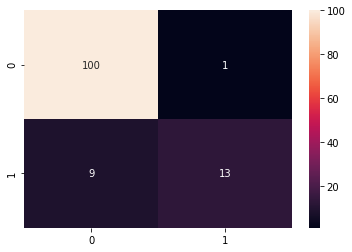

In [71]:
y_pred = model.predict(X_test_tf_idf_word)

cnf_matrix = confusion_matrix(y_test,y_pred) 
sns.heatmap(cnf_matrix,annot=True,fmt="d")

In [72]:
svm_tf_f1 = f1_score(y_test, y_pred, average='weighted')
svm_tf_f1

0.9112143502387404

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       101
           1       0.93      0.59      0.72        22

    accuracy                           0.92       123
   macro avg       0.92      0.79      0.84       123
weighted avg       0.92      0.92      0.91       123



**Random Forest**

In [74]:
model = RandomForestClassifier()
model.fit(X_train_count, y_train)

rf_count_acc = cross_val_score(model, X_test_count, y_test,cv = 10).mean()
print(rf_count_acc)

0.9044871794871794


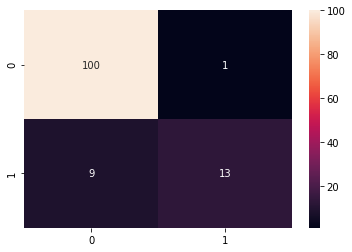

In [75]:
y_pred = model.predict(X_test_count)

cnf_matrix = confusion_matrix(y_test,y_pred) 
sns.heatmap(cnf_matrix,annot=True,fmt="d")

In [76]:
rf_count_f1 = f1_score(y_test, y_pred, average='weighted')
rf_count_f1

0.9112143502387404

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       101
           1       0.93      0.59      0.72        22

    accuracy                           0.92       123
   macro avg       0.92      0.79      0.84       123
weighted avg       0.92      0.92      0.91       123



In [78]:
model = RandomForestClassifier()
model.fit(X_train_tf_idf_word, y_train)


rf_tf_acc = cross_val_score(model, X_test_tf_idf_word, y_test,cv = 10).mean()
print(rf_tf_acc)

0.8794871794871796


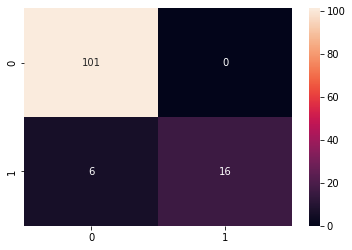

In [79]:
y_pred = model.predict(X_test_tf_idf_word)

cnf_matrix = confusion_matrix(y_test,y_pred) 
sns.heatmap(cnf_matrix,annot=True,fmt="d")

In [80]:
rf_tf_f1 = f1_score(y_test, y_pred, average='weighted')
rf_tf_f1

0.9480719857805866

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       101
           1       1.00      0.73      0.84        22

    accuracy                           0.95       123
   macro avg       0.97      0.86      0.91       123
weighted avg       0.95      0.95      0.95       123



**AdaBoost**

In [82]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_train_count, y_train)

ada_count_acc = cross_val_score(model, X_test_count, y_test,cv = 10).mean()
print(ada_count_acc)

0.8878205128205128


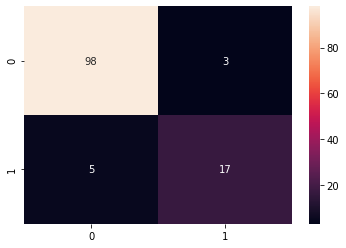

In [83]:
y_pred = model.predict(X_test_count)

cnf_matrix = confusion_matrix(y_test,y_pred) 
sns.heatmap(cnf_matrix,annot=True,fmt="d");

In [84]:
ada_count_f1 = f1_score(y_test, y_pred, average='weighted')
ada_count_f1

0.9337295893967343

In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       101
           1       0.85      0.77      0.81        22

    accuracy                           0.93       123
   macro avg       0.90      0.87      0.89       123
weighted avg       0.93      0.93      0.93       123



In [86]:
model = AdaBoostClassifier()
model.fit(X_train_tf_idf_word, y_train)


ada_tf_acc = cross_val_score(model, X_test_tf_idf_word, y_test,cv = 10).mean()
print(ada_tf_acc)

0.9115384615384615


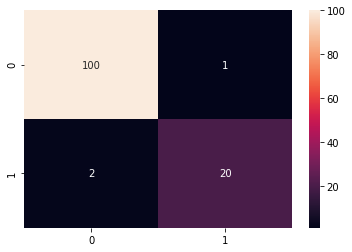

In [87]:
y_pred = model.predict(X_test_tf_idf_word)

cnf_matrix = confusion_matrix(y_test,y_pred) 
sns.heatmap(cnf_matrix,annot=True,fmt="d");

In [88]:
ada_tf_f1 = f1_score(y_test, y_pred, average='weighted')
ada_tf_f1

0.9753862231026939

In [89]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       101
           1       0.95      0.91      0.93        22

    accuracy                           0.98       123
   macro avg       0.97      0.95      0.96       123
weighted avg       0.98      0.98      0.98       123



**Comparison of Models' Accuracies and f1 Scores**

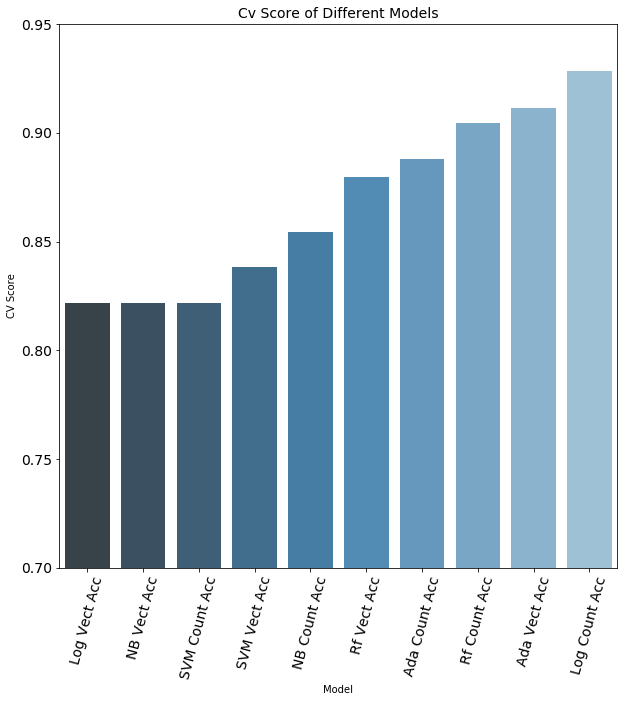

In [102]:
compare = pd.DataFrame({"Model": ["Log Count Acc", "Log Vect Acc", "NB Count Acc", "NB Vect Acc",
                                  "SVM Count Acc","SVM Vect Acc","Ada Count Acc","Ada Vect Acc","Rf Count Acc","Rf Vect Acc"],
                        "CV Score": [log_count_acc, log_tf_acc, nb_count_acc, nb_tf_acc, svm_count_acc, svm_tf_acc,ada_count_acc,ada_tf_acc,rf_count_acc,rf_tf_acc]})

compare = compare.sort_values(by="CV Score", ascending=True)

plt.figure(figsize=(10,10))
ax = sns.barplot(y="CV Score", x="Model", data=compare, palette="Blues_d")
ax.set_ylim(.70, 0.95)
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.xticks(rotation=75)
plt.title("Cv Score of Different Models", size=14);

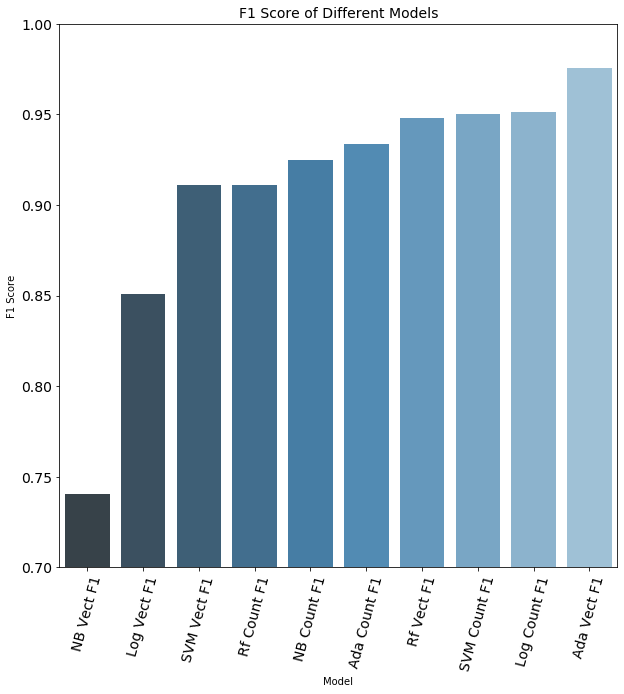

In [103]:
compare = pd.DataFrame({"Model": ["Log Count F1", "Log Vect F1", "NB Count F1", "NB Vect F1",
                                  "SVM Count F1","SVM Vect F1","Ada Count F1","Ada Vect F1","Rf Count F1","Rf Vect F1"],
                        "F1 Score": [log_count_f1, log_tf_f1, nb_count_f1, nb_tf_f1, svm_count_f1, svm_tf_f1,ada_count_f1,ada_tf_f1,rf_count_f1,rf_tf_f1]})

compare = compare.sort_values(by="F1 Score", ascending=True)

plt.figure(figsize=(10,10))
ax = sns.barplot(y="F1 Score", x="Model", data=compare, palette="Blues_d")
ax.set_ylim(.70, 1.00)
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.xticks(rotation=75)
plt.title("F1 Score of Different Models", size=14);